In [198]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


### View summary of dataset

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

### Summary of variables


- There are 15 variables in the dataset. 6 variables are of categorical data type, 2 variables are boolean, 8 variables are numerical.


- `Age`, `Gender`, `Country`, `Coffee_Intake`, `Caffeine_mg`, `Sleep_Hours`, `Sleep_Quality`, `BMI`, `Heart_Rate`, `Stress_Level`, `Physical_Activity_Hours`, `Occupation`, `Smoking`, `Alcohol_Consumption` are the input variables


- `Health_Issues` is the target variable.

In [201]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


From the table above, there isn't any anomali data or outliers

In [202]:
# Display unique values for each column
for col in df.columns:
  print(f"Unique values for column '{col}':")
  print(df[col].unique())
  print("-" * 20)

Unique values for column 'ID':
[    1     2     3 ...  9998  9999 10000]
--------------------
Unique values for column 'Age':
[40 33 42 53 32 44 29 41 37 18 28 22 38 24 52 35 36 21 39 27 31 57 34 20
 19 43 26 47 30 46 51 25 45 64 48 61 23 50 67 80 62 60 56 54 49 59 58 71
 55 65 66 63 73 72 68 70 69 77 75]
--------------------
Unique values for column 'Gender':
['Male' 'Female' 'Other']
--------------------
Unique values for column 'Country':
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
--------------------
Unique values for column 'Coffee_Intake':
[3.5 1.  5.3 2.6 3.1 3.4 2.7 4.5 1.7 4.  4.1 4.7 1.4 3.2 4.3 0.7 2.2 0.
 2.4 4.6 0.4 1.9 0.8 2.5 1.5 2.8 4.4 3.8 2.  3.3 2.1 3.6 1.6 1.1 0.9 4.9
 0.1 5.4 1.3 0.6 1.8 2.9 4.2 2.3 3.9 1.2 7.6 0.2 7.1 5.2 0.5 3.7 5.  6.2
 3.  4.8 5.1 7.3 5.8 5.9 6.1 5.5 5.7 6.4 0.3 5.6 6.7 6.  6.5 6.3 8.2 7.2
 7.  6.

In [203]:
# Calculate null values and percentage
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100

# Create a DataFrame for columns with null values
null_df = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentages})

# Filter for columns with null values
null_df = null_df[null_df['Null Count'] > 0]


# Format the percentage with two decimal places and % symbol
null_df['Null Percentage'] = null_df['Null Percentage'].map('{:.2f}%'.format)


null_df

,Null Count,Null Percentage
Health_Issues,5941,59.41%


The only column that have null value is Health Issues, but after we see the unique value, it's not supposed to be Nan, but 'None'. That's why I replace Nan with None.

### Handle Missing Value

In [204]:
df = df.fillna('None')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,None,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,None,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [205]:
df = df.drop('ID', axis=1, errors='ignore')
df.head()


,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,None,Other,0,0
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,None,Service,0,0
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


ID is not really relevant to the model prediction, so I drop it

### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

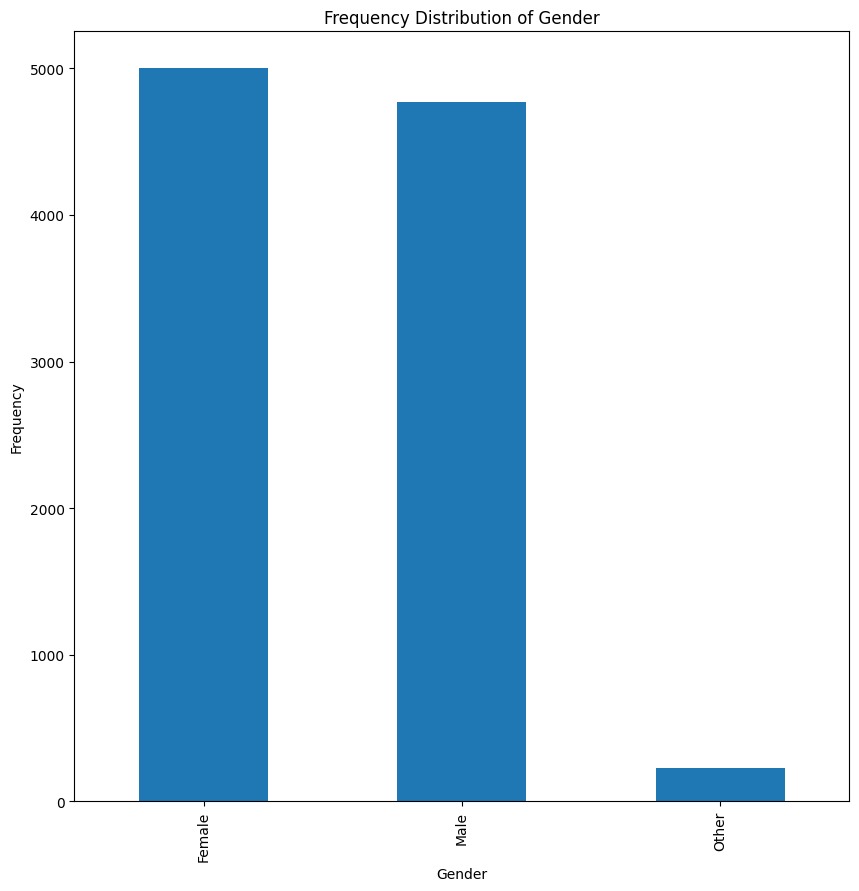

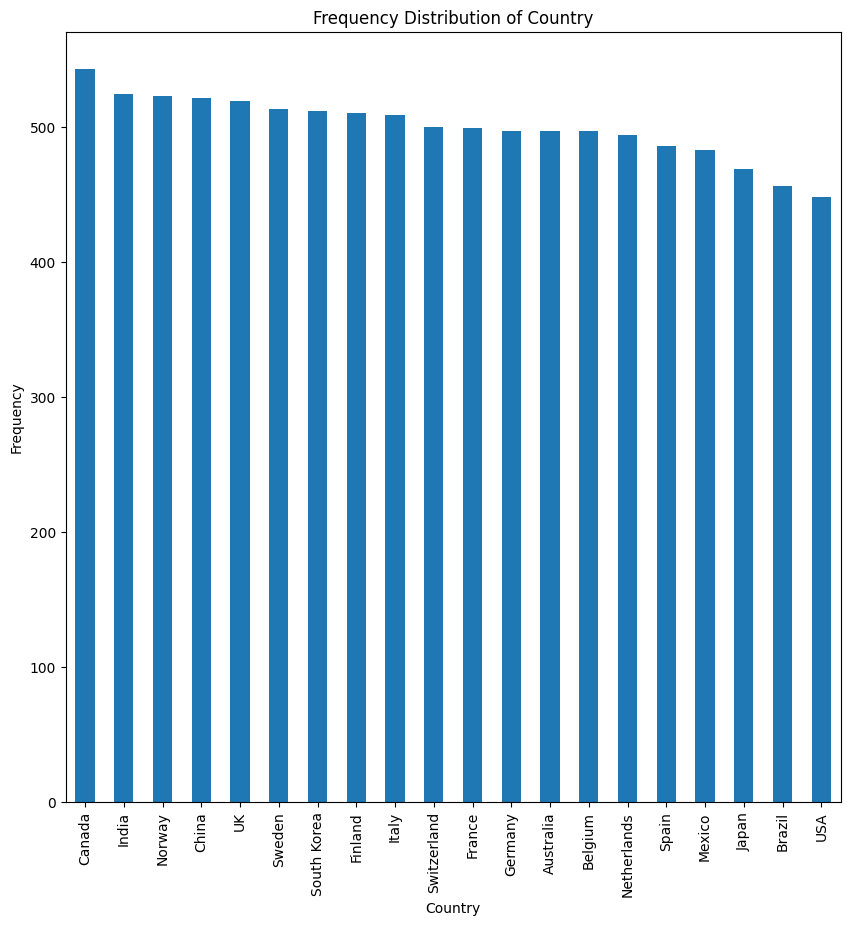

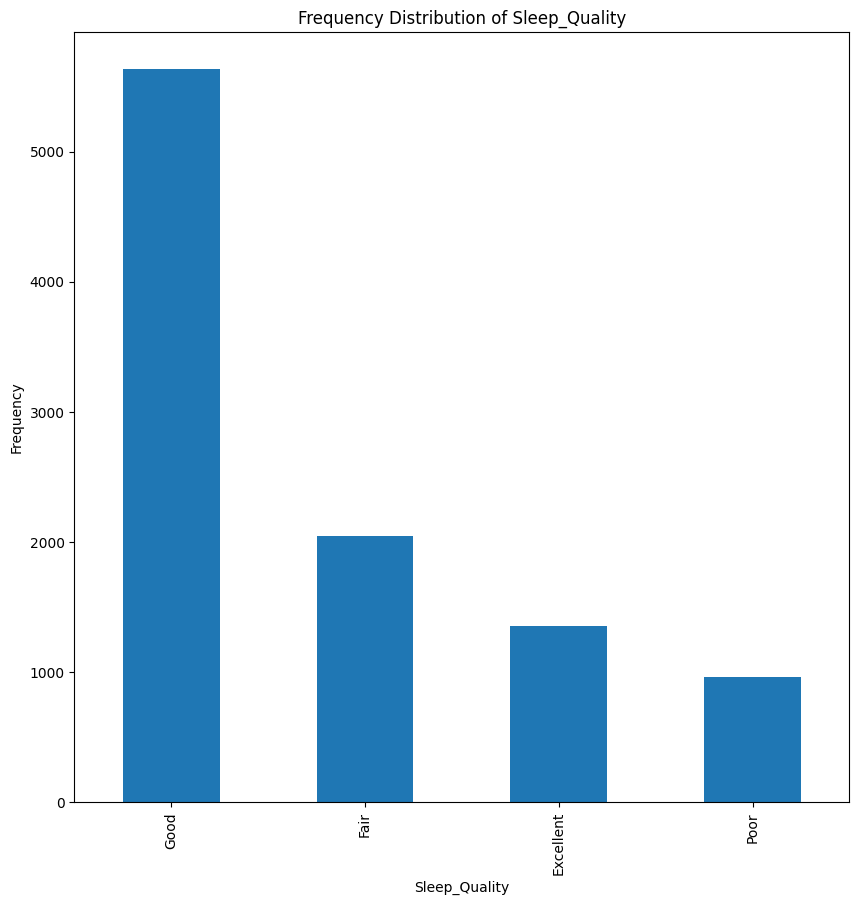

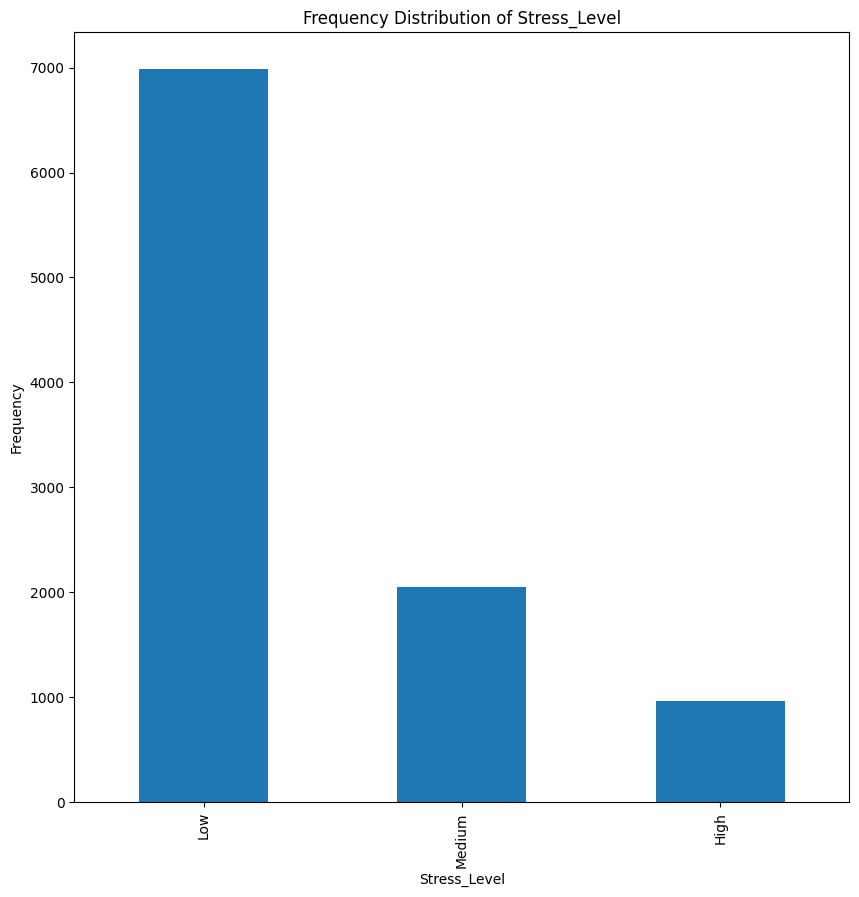

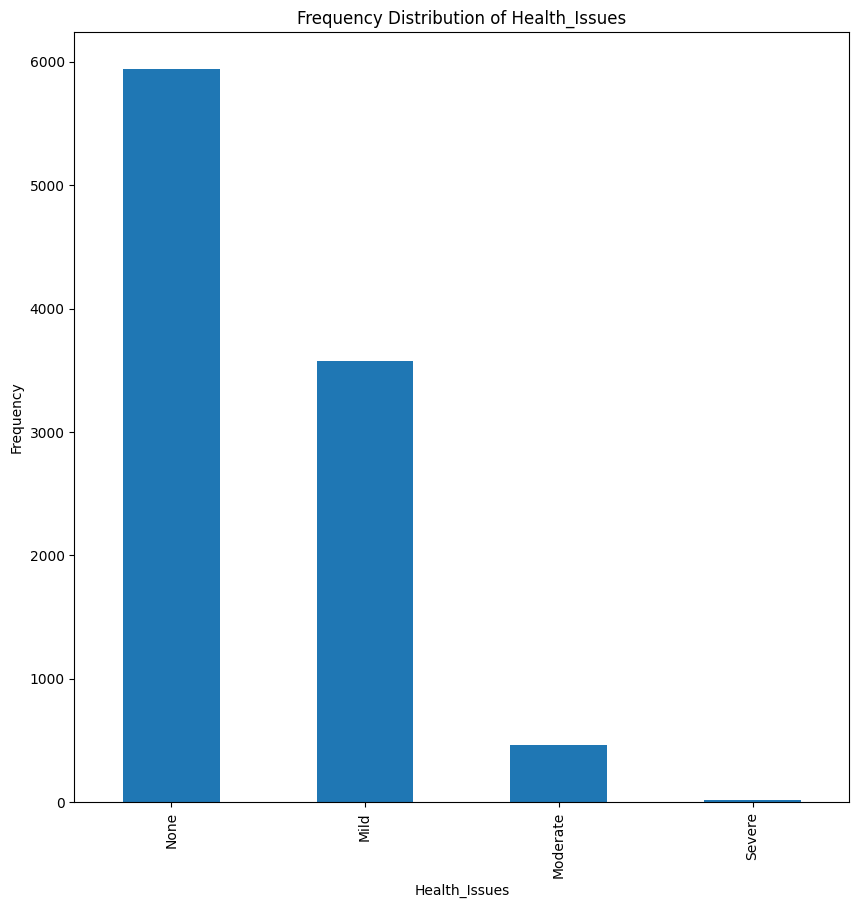

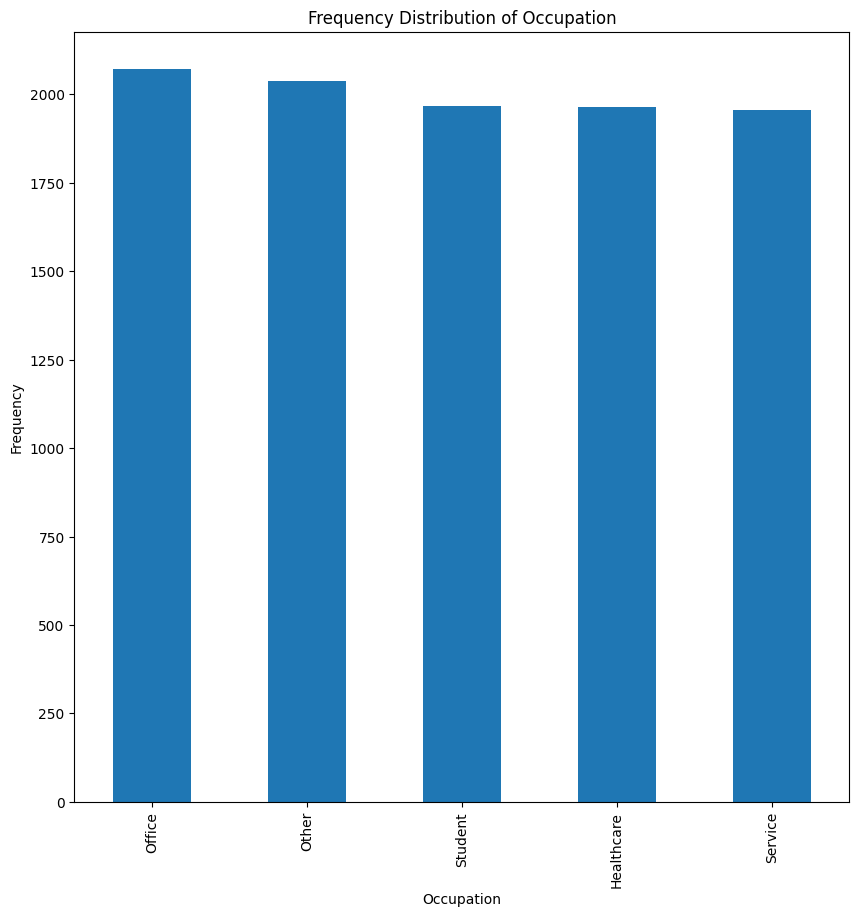

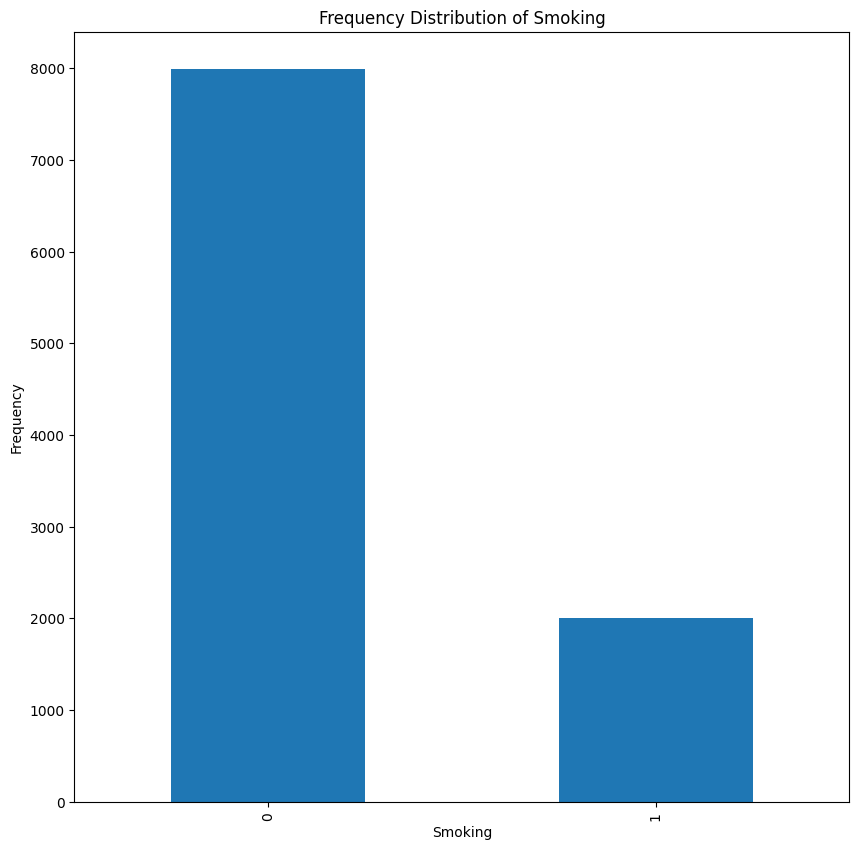

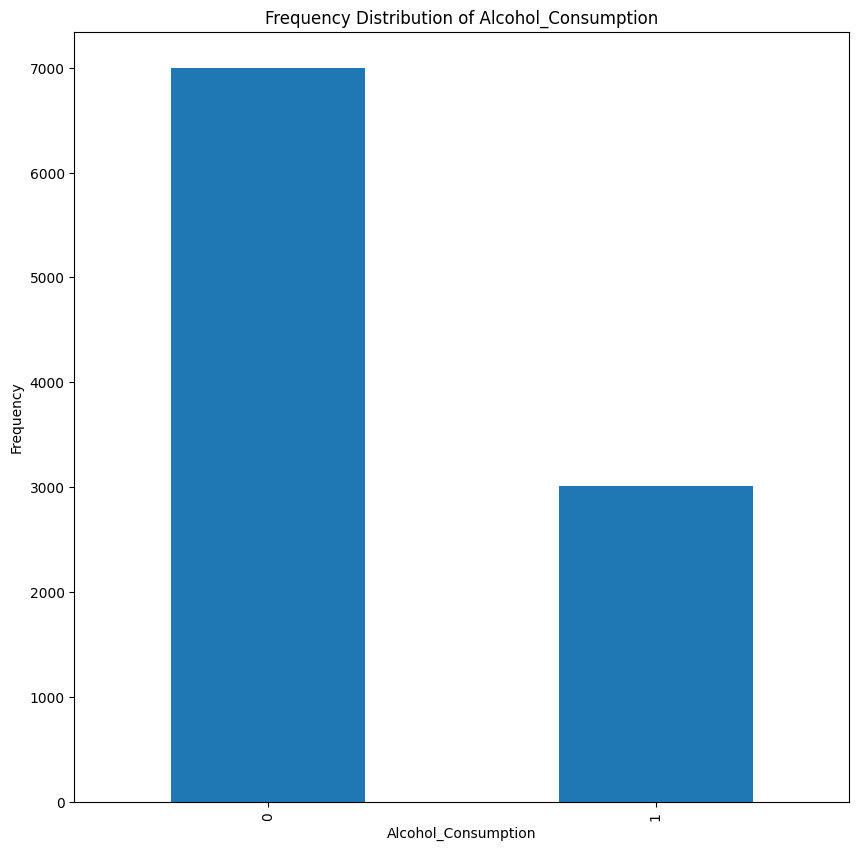

In [206]:
col_names = ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation', 'Smoking', 'Alcohol_Consumption']

for col in col_names:
  df[col].value_counts().plot(kind='bar')
  plt.title(f"Frequency Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

### Explore `class` variable

In [207]:
df['Health_Issues'].value_counts()

,count
Health_Issues,
None,5941
Mild,3579
Moderate,463
Severe,17


# **Exploratory Data Analysis** <a class="anchor" id="16"></a>

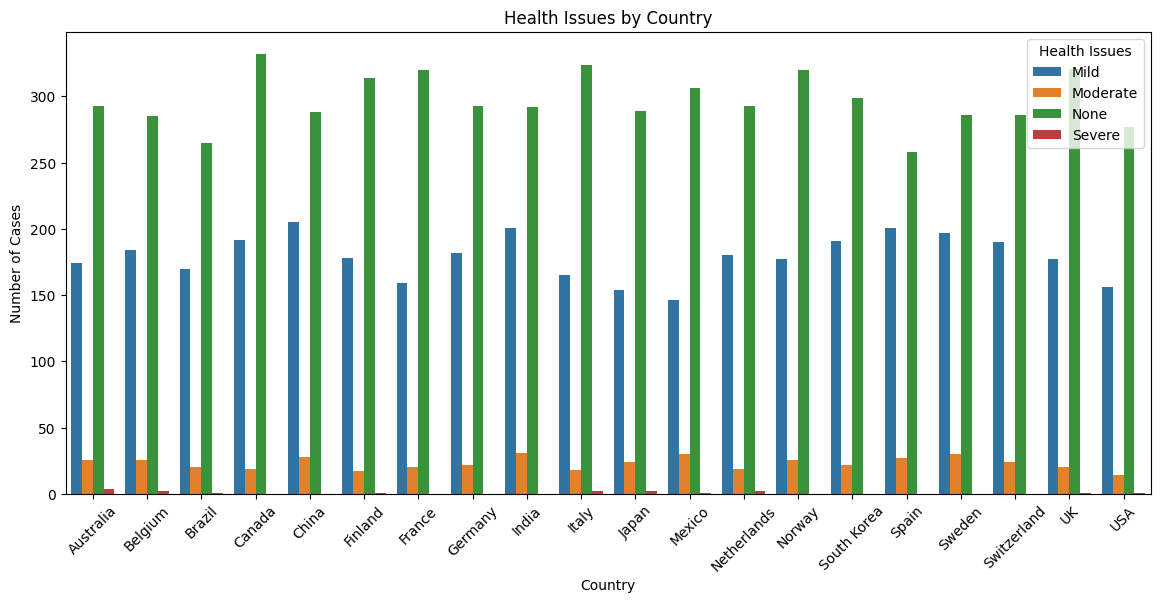

In [208]:
# Health_Issues Group by Country Bar Plot

# Count of Health Issues per Country
health_country = df.groupby(['Country', 'Health_Issues']).size().reset_index(name='Count')

# Bar plot
plt.figure(figsize=(14,6))
sns.barplot(x='Country', y='Count', hue='Health_Issues', data=health_country)
plt.title('Health Issues by Country')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Health Issues')
plt.show()

The chart reveals that Australia appears to have the highest proportion of SEVERE cases based on the chart. USA has the highest TOTAL cases but Australia leads in severe health issues.Severe cases are distributed across multiple countries but Australia stands out

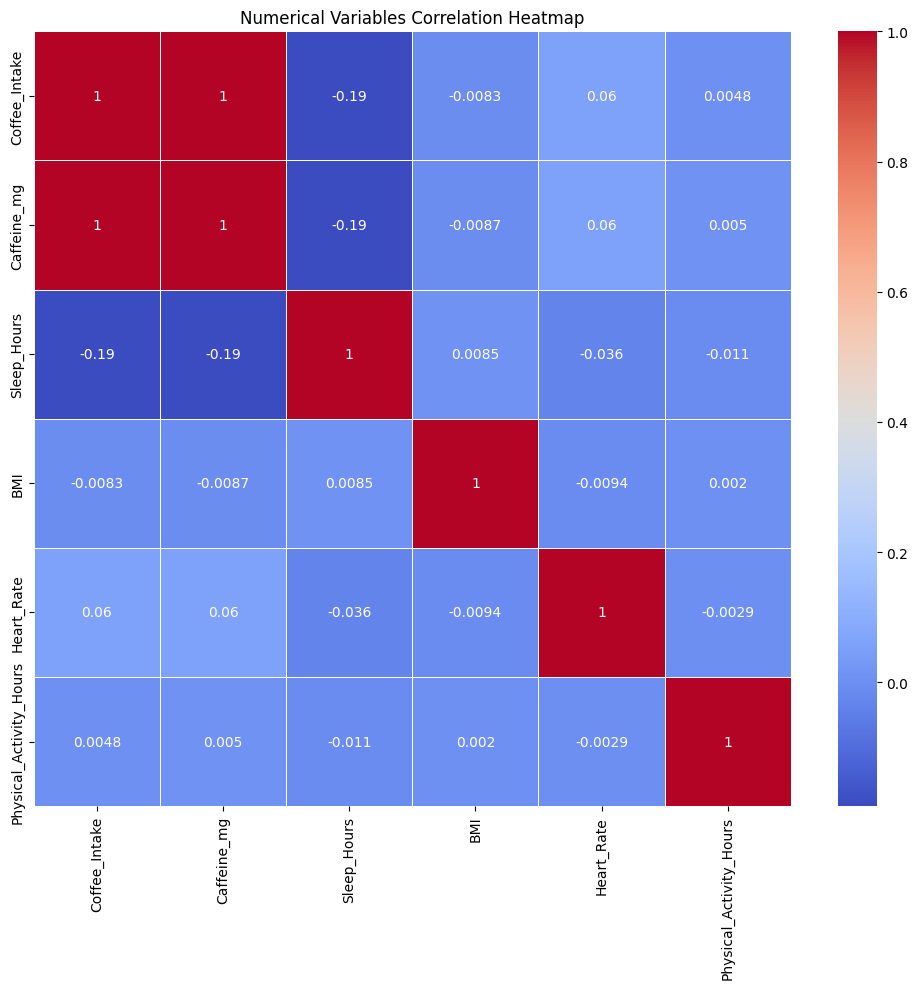

In [209]:
# Numerical Variables Correlation Heatmap
numerical_features = [
    'Coffee_Intake',
    'Caffeine_mg',
    'Sleep_Hours',
    'BMI',
    'Heart_Rate',
    'Physical_Activity_Hours'
]

correlation_matrix = df[numerical_features].corr()

# Heatmap plot
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Numerical Variables Correlation Heatmap")
plt.tight_layout()
plt.show()

This dataset shows concerningly weak correlations for health analytics. The perfect correlation between coffee intake and caffeine mg indicates data redundancy, while the overall weak relationships suggest either data quality issues or that these health metrics operate through complex, non-linear mechanisms not captured by simple correlations.

### Encode categorical variables

In [156]:
for column in ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation', 'Smoking', 'Alcohol_Consumption']:
  print(df[column].unique())

['Male' 'Female' 'Other']
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
['Good' 'Fair' 'Excellent' 'Poor']
['Low' 'Medium' 'High']
['None' 'Mild' 'Moderate' 'Severe']
['Other' 'Service' 'Office' 'Student' 'Healthcare']
[0 1]
[0 1]


In [157]:
# Encoding for ordinal column
Gender_map = {'Male': 1, 'Female': 2, 'Other': 3}
Country_map = {'Germany':1, 'Brazil':2, 'Spain':3, 'Mexico':4, 'France':5, 'Canada':6, 'UK':7, 'Switzerland':8,
 'Netherlands':9, 'Italy':10, 'China':11, 'Japan':12, 'Belgium':13, 'Finland':14, 'Australia':15,
 'USA':16, 'Sweden':17, 'India':18, 'Norway':19, 'South Korea':20}
Sleep_Quality_map = {'Excellent':4, 'Good':3, 'Fair':2, 'Poor':1}
Stress_Level_map = {'Low':3, 'Medium':2, 'High':1}
Health_Issues_map = {'None':4, 'Mild':3, 'Moderate':2, 'Severe':1}
Occupation_map = {'Other':5, 'Service':4, 'Office':3, 'Student':2, 'Healthcare':1}
Binary_map = {'Yes':1, 'No':0}

df['Gender'] = df['Gender'].map(Gender_map)
df['Country'] = df['Country'].map(Country_map)
df['Sleep_Quality'] = df['Sleep_Quality'].map(Sleep_Quality_map)
df['Stress_Level'] = df['Stress_Level'].map(Stress_Level_map)
df['Health_Issues'] = df['Health_Issues'].map(Health_Issues_map)
df['Occupation'] = df['Occupation'].map(Occupation_map)

df.sample(n = 5)

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
7674,24,1,5,2.3,219.6,6.9,3,23.7,56,3,9.4,4,2,0,0
6907,30,1,20,2.0,186.8,7.1,3,31.9,66,3,7.8,3,1,0,1
7643,35,1,10,1.5,142.5,7.4,3,29.4,70,3,5.2,4,3,0,1
1198,37,2,5,4.8,453.4,6.9,3,25.3,51,3,14.9,4,3,1,1
1690,42,2,9,3.8,360.8,8.1,4,20.2,67,3,9.1,4,2,1,1


# **Declare feature vector and target variable** <a class="anchor" id="10"></a>


In [158]:
X = df.drop(['Health_Issues'], axis=1)

y = df['Health_Issues']

In [159]:
X.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,40,1,1,3.5,328.1,7.5,3,24.9,78,3,14.5,5,0,0
1,33,1,1,1.0,94.1,6.2,3,20.0,67,3,11.0,4,0,0
2,42,1,2,5.3,503.7,5.9,2,22.7,59,2,11.2,3,0,0
3,53,1,1,2.6,249.2,7.3,3,24.7,71,3,6.6,5,0,0
4,32,2,3,3.1,298.0,5.3,2,24.1,76,2,8.5,2,0,1


In [160]:
y.head()

,Health_Issues
0,4
1,4
2,3
3,3
4,3


# **Split data into separate training and test set** <a class="anchor" id="11"></a>

In [161]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [162]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

 # result : 8000 rows, 14 column & 2000 rows, 14 columm

((8000, 14), (2000, 14))

In [163]:
X_train.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
9254,37,1,3,4.3,405.6,5.4,2,18.0,86,2,2.4,4,0,1
1561,26,1,18,0.0,0.0,5.5,2,28.3,75,2,10.8,5,0,0
1670,32,1,20,2.8,268.1,7.3,3,27.4,69,3,8.6,3,0,0
6087,18,1,20,2.2,208.6,8.1,4,16.3,83,3,8.9,5,0,1
6669,43,2,7,2.6,251.1,9.4,4,25.4,68,3,3.4,3,0,0


In [164]:
X_test.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
6252,66,1,19,2.6,245.9,6.7,3,30.1,76,3,1.9,4,0,1
4684,22,2,4,3.1,293.1,7.6,3,20.4,69,3,5.0,4,0,0
1731,30,1,15,3.9,372.4,6.4,3,27.5,75,3,13.8,3,0,0
4742,35,1,1,1.0,92.5,5.3,2,23.1,71,2,2.4,4,0,0
4521,47,1,10,1.3,119.0,6.9,3,28.4,64,3,9.6,3,1,0


We now have training and test set ready for model building.

# **Decision Tree Classifier with criterion gini index** <a class="anchor" id="13"></a>


In [165]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [166]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, random_state=0)

### Predict the Test set results with criterion gini index

In [167]:
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [168]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9980


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

### Visualize decision-trees

[Text(0.5, 0.9285714285714286, 'x[6] <= 2.5\ngini = 0.519\nsamples = 8000\nvalue = [12, 380, 2885, 4723]'),
 Text(0.25, 0.7857142857142857, 'x[0] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [12, 349, 2085, 0]'),
 Text(0.375, 0.8571428571428572, 'True  '),
 Text(0.125, 0.6428571428571429, 'x[7] <= 29.95\ngini = 0.118\nsamples = 2225\nvalue = [0, 140, 2085, 0]'),
 Text(0.0625, 0.5, 'gini = 0.0\nsamples = 2079\nvalue = [0, 0, 2079, 0]'),
 Text(0.1875, 0.5, 'x[7] <= 30.05\ngini = 0.079\nsamples = 146\nvalue = [0, 140, 6, 0]'),
 Text(0.125, 0.35714285714285715, 'x[8] <= 64.0\ngini = 0.49\nsamples = 14\nvalue = [0, 8, 6, 0]'),
 Text(0.0625, 0.21428571428571427, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0]'),
 Text(0.1875, 0.21428571428571427, 'x[2] <= 12.5\ngini = 0.397\nsamples = 11\nvalue = [0, 8, 3, 0]'),
 Text(0.125, 0.07142857142857142, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3, 0]'),
 Text(0.25, 0.07142857142857142, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0, 0]'),
 Text(0.25, 

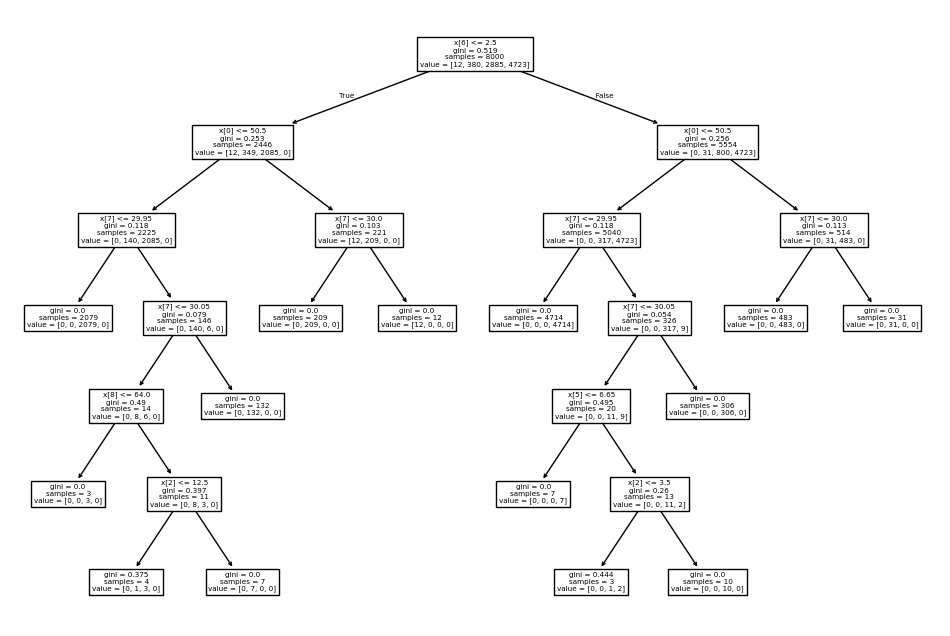

In [169]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

# **Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>


In [170]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

### Predict the Test set results with criterion entropy

In [171]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [172]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9980


### Visualize decision-trees

[Text(0.5, 0.9285714285714286, 'x[6] <= 2.5\nentropy = 1.202\nsamples = 8000\nvalue = [12, 380, 2885, 4723]'),
 Text(0.25, 0.7857142857142857, 'x[0] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [12, 349, 2085, 0]'),
 Text(0.375, 0.8571428571428572, 'True  '),
 Text(0.125, 0.6428571428571429, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 2225\nvalue = [0, 140, 2085, 0]'),
 Text(0.0625, 0.5, 'entropy = 0.0\nsamples = 2079\nvalue = [0, 0, 2079, 0]'),
 Text(0.1875, 0.5, 'x[7] <= 30.05\nentropy = 0.247\nsamples = 146\nvalue = [0, 140, 6, 0]'),
 Text(0.125, 0.35714285714285715, 'x[8] <= 64.0\nentropy = 0.985\nsamples = 14\nvalue = [0, 8, 6, 0]'),
 Text(0.0625, 0.21428571428571427, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0]'),
 Text(0.1875, 0.21428571428571427, 'x[2] <= 12.5\nentropy = 0.845\nsamples = 11\nvalue = [0, 8, 3, 0]'),
 Text(0.125, 0.07142857142857142, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3, 0]'),
 Text(0.25, 0.07142857142857142, 'entropy = 0.0\nsamples = 7\nvalue

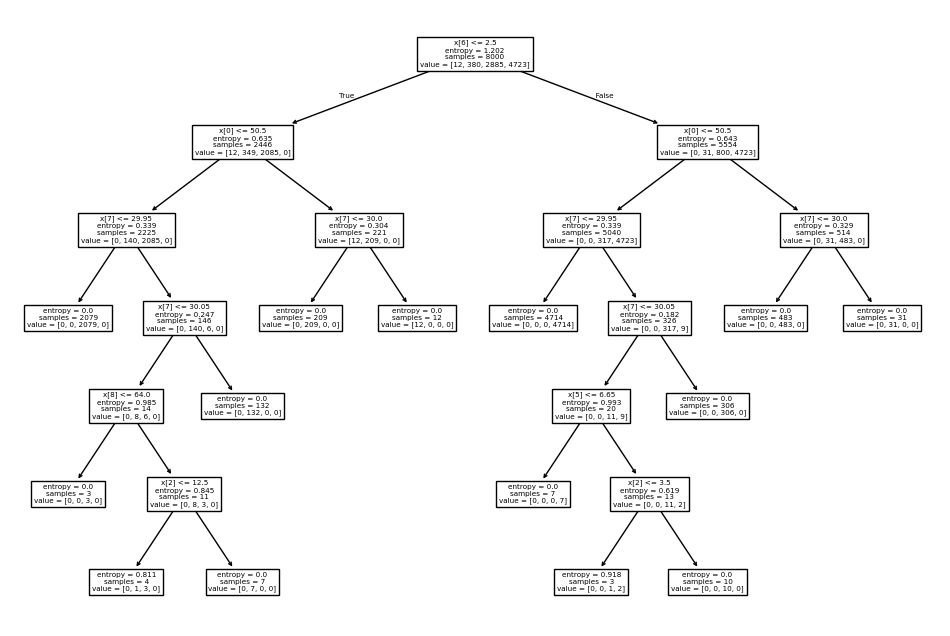

In [173]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

# **Naive Bayes** <a class="anchor" id="16"></a>

In [174]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [175]:
y_pred_nb = nb_classifier.predict(X_test)

### Check accuracy score with naive bayes

In [176]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.8570


# **Classification Report** <a class="anchor" id="16"></a>



**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [177]:
# DECISION TREE ENTROPY
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      0.99      0.99        83
           3       0.99      1.00      1.00       694
           4       1.00      1.00      1.00      1218

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [178]:
# DECISION TREE GINI
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      0.99      0.99        83
           3       0.99      1.00      1.00       694
           4       1.00      1.00      1.00      1218

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [179]:
# DECISION TREE NAIVE BAYES
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.71      0.14      0.24        83
           3       0.88      0.70      0.78       694
           4       0.85      1.00      0.92      1218

    accuracy                           0.86      2000
   macro avg       0.61      0.46      0.48      2000
weighted avg       0.85      0.86      0.84      2000



In [186]:
from sklearn.metrics import accuracy_score
import pandas as pd

y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_en.predict(X_test)
y_pred_gnb = nb_classifier.predict(X_test)

acc_gini = accuracy_score(y_test, y_pred_gini)
acc_entropy = accuracy_score(y_test, y_pred_entropy)
acc_gnb = accuracy_score(y_test, y_pred_gnb)

accuracy_table = pd.DataFrame({
    'Model': ['Decision Tree (gini)', 'Decision Tree (entropy)', 'Gaussian Naive Bayes'],
    'Accuracy': [acc_gini, acc_entropy, acc_gnb]
})

accuracy_table

,Model,Accuracy
0,Decision Tree (gini),0.998
1,Decision Tree (entropy),0.998
2,Gaussian Naive Bayes,0.857


From the comparison results above, we can see that the most accurate models are the Decision Tree (Gini) and Decision Tree (Entropy), which both have an accuracy of 0.998. On the other hand, the Gaussian Naive Bayes model only achieved an accuracy of 0.857.

# **Predict New Data** <a class="anchor" id="16"></a>

In [180]:
# Make a prediction with the gini index model

# Input values: buying high, maint low, doors 4, persons 2, lug_boot med, safety low
# These values need to be encoded according to the maps created earlier
new_data = {
'Age': 28,
'Gender': Gender_map['Male'],
'Country': Country_map['Brazil'],
'Coffee_Intake': 3,
'Caffeine_mg': 280,
'Sleep_Hours': 5,
'Sleep_Quality': Sleep_Quality_map['Poor'],
'BMI': 25.4,
'Heart_Rate': 85,
'Stress_Level': Stress_Level_map['High'],
'Physical_Activity_Hours': 2,
'Occupation': Occupation_map['Student'],
'Smoking': Binary_map['Yes'],
'Alcohol_Consumption': Binary_map['Yes']
}


# Convert the input data to a pandas DataFrame
input_df = pd.DataFrame([new_data])

# Make the prediction using the gini model
prediction_gini = clf_gini.predict(input_df)

print("Prediction:", prediction_gini[0])

# To get the inverse, we can use the class_map to get the original label
# This was already done in the previous step to print the predicted class.
# class_map = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}
# class_map.items() → mengembalikan pasangan (key, value) misalnya ('unacc',0).
# {v:k for k,v in class_map.items()} → menukar posisi key & value.
# inv_class_map = {1: 'unacc', 2: 'acc', 3: 'good', 4: 'vgood'}

# reverse dictionary --> biar outputnya lebih jelas, oh itu unacc. kalo cuma '1', '2', '3' biasanya stakeholder kan gatau
inverse_prediction_gini = {v:k for k,v in Health_Issues.items()}

print(f"The predicted class for the given input using the gini index model is: {inverse_prediction_gini[prediction_gini[0]]}")

Prediction: 3
The predicted class for the given input using the gini index model is: Mild
